In [1]:
import sys
from glob import glob

import h5py
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

In [2]:
sys.path.insert(0, '/glade/u/home/ksha/NCAR/')
sys.path.insert(0, '/glade/u/home/ksha/NCAR/libs/')

from namelist import *
import data_utils as du
import preprocess_utils as pu

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import importlib
importlib.reload(du)

<module 'data_utils' from '/glade/u/home/ksha/NCAR/libs/data_utils.py'>

In [5]:
with h5py.File(save_dir+'CONUS_domain.hdf', 'r') as h5io:
    lon = h5io['lon_72km'][...]
    lat = h5io['lat_72km'][...]
    lon_3km = h5io['lon_3km'][...]
    lat_3km = h5io['lat_3km'][...]

In [6]:
import pygrib

In [24]:
with pygrib.open(HRRR_dir+'hrrr.t00z.wrfsfcf10.grib2') as grbio:
    var_list = grbio()
    var = grbio.select(name='U component of wind')[0]
    lat_hrrr, lon_hrrr = var.latlons()

In [38]:
grid_shape = lon_3km.shape
grid_hrrr = lon_hrrr.shape

In [61]:
N_windowx = grid_hrrr[0] - grid_shape[0] + 1
N_windowy = grid_hrrr[1] - grid_shape[1] + 1

loss = 1e9
xi_best = 9999
yi_best = 9999

for xi in range(N_windowx):
    for yi in range(N_windowy):

        temp_sub_lat = lat_hrrr[xi:xi+grid_shape[0], yi:yi+grid_shape[1]]
        temp_sub_lon = lon_hrrr[xi:xi+grid_shape[0], yi:yi+grid_shape[1]]
        
        temp_diff_lat = np.sum(np.abs(temp_sub_lat-lat_3km))
        temp_diff_lon = np.sum(np.abs(temp_sub_lon-lon_3km))
        
        temp_loss = temp_diff_lat+temp_diff_lon
        
        if temp_loss < loss:
            loss = temp_loss
            xi_best = xi
            yi_best = yi

In [62]:
temp_loss

7694146.214037703

In [65]:
xi_best, xi_best+grid_shape[0]

(32, 1017)

In [66]:
yi_best, yi_best+grid_shape[1]

(109, 1689)

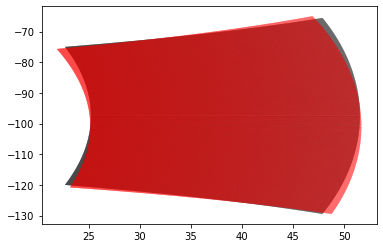

In [68]:
plt.plot(lat_hrrr[32:1017, 109:1689], lon_hrrr[32:1017, 109:1689], 'k-', lw=0.1);
plt.plot(lat_3km, lon_3km, 'r-', lw=0.1);

In [10]:
var_list

[1:Pressure:Pa (instant):lambert:hybrid:level 1:fcst time 10 hrs:from 201701010000,
 2:Cloud mixing ratio:kg kg**-1 (instant):lambert:hybrid:level 1:fcst time 10 hrs:from 201701010000,
 3:Cloud Ice:kg m**-2 (instant):lambert:hybrid:level 1:fcst time 10 hrs:from 201701010000,
 4:Rain mixing ratio:kg kg**-1 (instant):lambert:hybrid:level 1:fcst time 10 hrs:from 201701010000,
 5:Snow mixing ratio:kg kg**-1 (instant):lambert:hybrid:level 1:fcst time 10 hrs:from 201701010000,
 6:Graupel (snow pellets):kg kg**-1 (instant):lambert:hybrid:level 1:fcst time 10 hrs:from 201701010000,
 7:28:28 (instant):lambert:hybrid:level 1:fcst time 10 hrs:from 201701010000,
 8:29:29 (instant):lambert:hybrid:level 1:fcst time 10 hrs:from 201701010000,
 9:100:100 (instant):lambert:hybrid:level 1:fcst time 10 hrs:from 201701010000,
 10:Particulate matter (fine):(10**-6 g) m**-3 (instant):lambert:hybrid:level 1:fcst time 10 hrs:from 201701010000,
 11:Particulate matter (coarse):(10**-6 g) m**-3 (instant):lambert: